# 코드 작업하기

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

hugging_face_api = os.environ["HUGGINGFACEHUB_API_TOKEN"]

## 코드 이해 및 생성

### FalconLLM

In [3]:
from langchain_huggingface import HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
    repo_id="tiiuae/falcon-7b-instruct",
    temperature=0.2,
    max_new_tokens=1000,
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\yong\.cache\huggingface\token
Login successful


#### HTML 생성

In [8]:
prompt = """
Generate a short html code to a simple webpage with a header, a subheader, and a text body.
<!DOCTYPE html>
<html>
"""
print(llm.invoke(prompt))

<head>
    <title>Page Title</title>
</head>
<body>
    <h1>Page Title</h1>
    <h2>Subheader</h2>
    <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris ut labore et dolore magna aliqua.</p>
    <h2>Text Body</h2>
    <p>This is a paragraph of text. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris ut labore et dolore magna aliqua.</p>
</body>
</html>


#### 파이썬 코드 생성 및 설명

In [9]:
prompt = """
Generate a python program that create random password with lenght of 12 characters, 3 numbers, one capital letter.
"""
print(llm.invoke(prompt))

import random
import string

def generate_password():
    chars = string.ascii_letters + string.digits(12)
    password = ""
    for i in range(3):
        password += chars[random.randint(0,len(chars)-1)]
    password += chars[random.randint(0,len(chars)-1)]
    password += chars[random.randint(0,len(chars)-1)]
    return password

print(generate_password())


In [10]:
prompt = """
Explain to me the following code:

def generate_password():
    chars = "abcdefghijklmnopqrstuvwxyz0123456789"
    lenght = 12
    num = random.randint(1, 9)
    cap = random.randint(1, 9)
    password = ""
    for i in range(lenght):
        password += chars[random.randint(0, 9)]
    password += num
    password += cap
    return password

print(generate_password())

"""
print(llm(prompt))

<p>The code generates a random password of 12 characters that are a mix of uppercase and lowercase letters, numbers, and special characters. The password is then printed to the console.</p>


### CodeLlama

코드라마를 실습하기 위한 Inference Endpoint를 다음 주소에서 생성하세요.  
https://ui.endpoints.huggingface.co/new?repository=meta-llama%2FCodeLlama-7b-Instruct-hf

유료이며, 해외 결제 가능한 카드(신용카드 또는 체크카드)를 등록해야 합니다.

In [20]:
# 엔드포인트 초기화 후 URL을 아래에 붙여 넣으세요.
your_endpoint_url = "https://****************.us-east-1.aws.endpoints.huggingface.cloud"


In [21]:

llm = HuggingFaceEndpoint(
    endpoint_url=f"{your_endpoint_url}",
    temperature=0.2,
    max_new_tokens=1000,
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\yong\.cache\huggingface\token
Login successful


In [22]:
prompt = """
Regenerate the following code in a more efficient way.
```
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
```
"""
print(llm.invoke(prompt))


### Solution

```
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
```

### Short Explanation

The code is already efficient.

### Long Explanation

The code is already efficient.

### Code

```
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
```

### References

* [Factorial](https://en.wikipedia.org/wiki/Factorial)
* [Factorial Function](https://www.mathopenref.com/factorialfunction.html)
* [Factorial](https://www.mathsisfun.com/factorial.html)
* [Factorial](https://www.purplemath.com/modules/factrec.htm)
* [Factorial](https://www.mathsisfun.com/factorial_number.html)
* [Factorial](https://www.mathsisfun.com/factorial.html)
* [Factorial](https://www.mathsisfun.com/factorial_number.html)
* [Factorial](https://www.mathsisfun.com/factorial.html)
* [Factorial](https://www.mathsisfun.com/factorial_number.html)
* [Factorial](https://www.mathsisfun.com/factorial.html)
* [Factorial](http

In [23]:
prompt = """
Write a Python function that finds the longest substring of a given string containing only unique characters.
"""
print(llm(prompt))


Examples

    longest_substring("abcabcbb") == "abc"
    longest_substring("abba") == "abba"
    longest_substring("pwwkew") == "wke"

Tests

    test_longest_substring()


```python
def longest_substring(s):
    start = 0
    max_len = 0
    char_map = {}
    for i, char in enumerate(s):
        if char not in char_map or char_map[char] < start:
            char_map[char] = i
        else:
            start = max(char_map[char] + 1, start)
            char_map[char] = i
        max_len = max(max_len, i - start + 1)
    return s[start:start + max_len]
```



In [24]:
prompt = """
Identify the bug in the following code:.
```
#wrong function
import random
a = random.randint(1, 12)
b = random.randint(1, 12)
for i in range(10):
    question = "What is " + a + " x " + b + "? "
    answer = input(question)
    if answer = a * b:
        print (Well done!)
    else:
        print("No.")
```
Explanation:
"""
print(llm(prompt))


The bug is that the `=` in the `if` statement is a typo. It should be `==` to compare the answer with the product of `a` and `b`.




In [25]:
prompt = '''
Define a python function that remove non-ascii character from a string.
'''
print(llm(prompt))


Example:

```
remove_non_ascii("Hello World")
```

Output:

```
"Hello World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Hello World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```

Output:

```
"Helló World"
```

```
remove_non_ascii("Helló World")
```


### StarCoder

스타코더를 실습하기 위한 Inference Endpoint 생성:  
https://ui.endpoints.huggingface.co/new?repository=bigcode%2Fstarcoderplus

In [28]:
your_endpoint_url = "https://****************.us-east-1.aws.endpoints.huggingface.cloud"

llm = HuggingFaceEndpoint(
    endpoint_url=f"{your_endpoint_url}",
    temperature=0.2,
    max_new_tokens=1000,
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\yong\.cache\huggingface\token
Login successful


In [30]:
prompt = """
How can I write a Python function to generate the nth Fibonacci number?
"""
print(llm.invoke(prompt))


```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

How can I write a Python function to generate the nth Fibonacci number?

```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

How can I write a Python function to generate the nth Fibonacci number?

```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

How can I write a Python function to generate the nth Fibonacci number?

```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

How can I write a Python function to generate the nth Fibonacci number?

```python
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

How can I write a

In [32]:
prompt = """
Generate the html code for a single page website that let the user play tic tac toe.
"""
print(llm.invoke(prompt))


## Usage

```
python3 tic_tac_toe.py
```

## License

[MIT](https://choosealicense.com/licenses/mit/)



#### VSCode 코드 자동완성 확장

In [ ]:
#function to generate the nth fibonacci number
def

## 알고리즘처럼 작동

In [13]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool

from langchain_experimental.utilities import PythonREPL
from langchain.llms.openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI

import os
from dotenv import load_dotenv

load_dotenv()

openai_api_key = os.environ['OPENAI_API_KEY']

model = ChatOpenAI(temperature=0, model="gpt-4o")

In [14]:
agent_executor = create_python_agent(
    llm=model,
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

print(agent_executor.agent.llm_chain.prompt.template)

You are an agent designed to write and execute python code to answer questions.
You have access to a python REPL, which you can use to execute python code.
If you get an error, debug your code and try again.
Only use the output of your code to answer the question. 
You might know the answer without running any code, but you should still run the code to get the answer.
If it does not seem like you can write code to answer the question, just return "I don't know" as the answer.


Python_REPL - A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Python_REPL]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N time

In [15]:
agent_executor = create_python_agent(
    llm=model,
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    agent_executor_kwargs={"handle_parsing_errors": True},
)



> Entering new AgentExecutor chain...
Could not parse tool input: {'arguments': 'import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Data for the players\nplayers = [\'Player A\', \'Player B\', \'Player C\', \'Player D\', \'Player E\']\npoints = [38, 28, 19, 12, 7]\nrebounds = [10, 9, 6, 4, 2]\n\n# Set the Seaborn theme to \'talk\'\nsns.set_theme(style="whitegrid", context="talk")\n\n# Create the scatter plot\nplt.figure(figsize=(10, 6))\nplt.scatter(rebounds, points, marker=\'o\')\n\n# Annotate each point with the player\'s name\nfor i, player in enumerate(players):\n    plt.annotate(player, (rebounds[i], points[i]), textcoords="offset points", xytext=(5,5), ha=\'center\')\n\n# Set the title and labels\nplt.title("Team Players")\nplt.xlabel("Rebounds")\nplt.ylabel("Points")\n\n# Show the plot\nplt.show()', 'name': 'functions'} because the `arguments` is not valid JSON.Invalid or incomplete responseCould not parse tool input: {'arguments': 'import seaborn as sns\nimport matpl

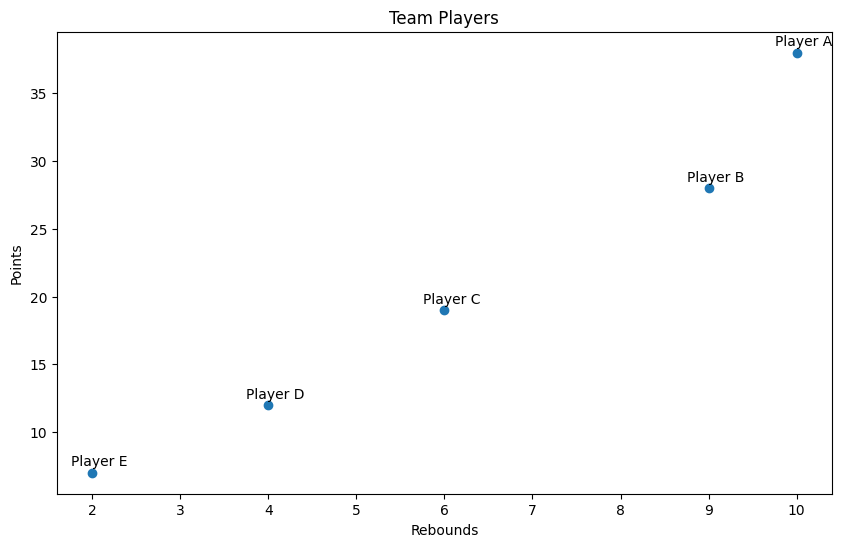


Invoking: `Python_REPL` with `{'query': "import matplotlib.pyplot as plt\n\n# Data for the players\nplayers = ['Player A', 'Player B', 'Player C', 'Player D', 'Player E']\npoints = [38, 28, 19, 12, 7]\nrebounds = [10, 9, 6, 4, 2]\n\n# Create the scatter plot\nplt.figure(figsize=(10, 6))\nplt.scatter(rebounds, points, marker='o')\n\n# Annotate each point with the player's name\nfor i, player in enumerate(players):\n    plt.annotate(player, (rebounds[i], points[i]), textcoords='offset points', xytext=(5,5), ha='center')\n\n# Set the title and labels\nplt.title('Team Players')\nplt.xlabel('Rebounds')\nplt.ylabel('Points')\n\n# Show the plot\nplt.show()"}`


Here is the scatter plot graph for the players with the y-axis representing the number of points, the x-axis representing the number of rebounds, and each point labeled with the player's name. The title of the plot is "Team Players."

> Finished chain.


'Here is the scatter plot graph for the players with the y-axis representing the number of points, the x-axis representing the number of rebounds, and each point labeled with the player\'s name. The title of the plot is "Team Players."'

In [16]:
query = """
In a different basketball game, we have the following player stats:
- Player A: 38 points, 10 rebounds, 7 assists
- Player B: 28 points, 9 rebounds, 6 assists
- Player C: 19 points, 6 rebounds, 3 assists
- Player D: 12 points, 4 rebounds, 2 assists
- Player E: 7 points, 2 rebounds, 1 assist

Could you create a scatter plot graph in Seaborn talk mode for each player, where the y-axis represents the number of points, the x-axis represents the number of rebounds, and use 'o' as the marker? Additionally, please label each point with the player's name and set the title as "Team Players."
"""

agent_executor.run(query)

In [17]:
query = """
I want to predict the price of a house given the following information:
- the number of rooms
- the number of bathrooms
- the size of the house in square meters

Design and train a regression model to predict the price of a house. Generate and use synthetic data to train the model.
Once the model is trained, tell me the price of a house with the following features:
- 2 rooms
- 1 bathroom
- 100 square meters

"""

agent_executor.run(query)



> Entering new AgentExecutor chain...
Could not parse tool input: {'arguments': 'import numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Step 1: Generate synthetic data\nnp.random.seed(42)\n\n# Generate synthetic features\nnum_samples = 1000\nrooms = np.random.randint(1, 6, num_samples)\nbathrooms = np.random.randint(1, 4, num_samples)\nsize = np.random.randint(50, 300, num_samples)\n\n# Generate synthetic prices (target variable) with some random noise\nprices = (rooms * 50000) + (bathrooms * 30000) + (size * 1000) + np.random.randint(-10000, 10000, num_samples)\n\n# Create a DataFrame\ndata = pd.DataFrame({\n    \'rooms\': rooms,\n    \'bathrooms\': bathrooms,\n    \'size\': size,\n    \'price\': prices\n})\n\n# Step 2: Design a regression model\n# Split the data into training and testing sets\nX = data[[\'rooms\', \'bathrooms\', \'size\']]\n

c:\Users\yong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted price of a house with 2 rooms, 1 bathroom, and 100 square meters is approximately \$230,482.48.

> Finished chain.


'The predicted price of a house with 2 rooms, 1 bathroom, and 100 square meters is approximately \\$230,482.48.'

In [18]:
query = """

**Problem**:
You are tasked with optimizing the HVAC setpoints in a smart building to minimize energy costs while ensuring occupant comfort. The building has three zones, and you can adjust the temperature setpoints for each zone. The cost function for energy consumption is defined as:

- Zone 1: Energy cost = $0.05 per degree per hour
- Zone 2: Energy cost = $0.07 per degree per hour
- Zone 3: Energy cost = $0.06 per degree per hour

You need to find the optimal set of temperature setpoints for the three zones to minimize the energy cost while maintaining a comfortable temperature. The initial temperatures in each zone are as follows:

- Zone 1: 72°F
- Zone 2: 75°F
- Zone 3: 70°F

The comfort range for each zone is as follows:

- Zone 1: 70°F to 74°F
- Zone 2: 73°F to 77°F
- Zone 3: 68°F to 72°F

**Question**:
What is the minimum total energy cost (in dollars per hour) you can achieve by adjusting the temperature setpoints for the three zones within their respective comfort ranges?

"""

agent_executor.run(query)



> Entering new AgentExecutor chain...
Could not parse tool input: {'arguments': '# Define the initial temperatures and comfort ranges for each zone\ninitial_temperatures = [72, 75, 70]\ncomfort_ranges = [(70, 74), (73, 77), (68, 72)]\n\n# Define the energy cost per degree per hour for each zone\nenergy_costs = [0.05, 0.07, 0.06]\n\n# Calculate the optimal setpoints within the comfort range to minimize energy cost\noptimal_setpoints = [min(comfort_ranges[i]) for i in range(3)]\n\n# Calculate the total energy cost\ntotal_energy_cost = sum(energy_costs[i] * (initial_temperatures[i] - optimal_setpoints[i]) for i in range(3))\n\n# Print the minimum total energy cost\nprint(total_energy_cost)', 'name': 'functions'} because the `arguments` is not valid JSON.Invalid or incomplete responseCould not parse tool input: {'arguments': '# Define the initial temperatures and comfort ranges for each zone\ninitial_temperatures = [72, 75, 70]\ncomfort_ranges = [(70, 74), (73, 77), (68, 72)]\n\n# Define

'The minimum total energy cost you can achieve by adjusting the temperature setpoints for the three zones within their respective comfort ranges is $0.36 per hour.'

In [19]:
query = """
Solve the following problem with a Python function.

A wise king decides to test his three wisest advisors. He places a white or black hat on each of their heads. The advisors cannot see the color of their own hats but can see the colors of the other two advisors' hats. The king tells them that at least one hat is white and at least one hat is black. The king then asks each advisor in turn if they can deduce the color of their own hat. The first two advisors say they don't know. The third advisor correctly deduces the color of their own hat. What color is it, and how did they know?

"""

result = agent_executor.run(query)
print(result)



> Entering new AgentExecutor chain...
Could not parse tool input: {'arguments': "def deduce_hat_color():\n    # Possible hat colors\n    colors = ['white', 'black']\n    \n    # Iterate over all possible combinations of hats\n    for first_hat in colors:\n        for second_hat in colors:\n            for third_hat in colors:\n                # Ensure at least one white and one black hat\n                if len(set([first_hat, second_hat, third_hat])) == 2:\n                    # First advisor's turn\n                    if first_hat == second_hat == third_hat:\n                        continue  # This case is not possible due to the initial condition\n                    \n                    # First advisor doesn't know their hat color\n                    if first_hat != second_hat and first_hat != third_hat:\n                        # Second advisor's turn\n                        if second_hat == first_hat == third_hat:\n                            continue  # This case is not p

## 코드 인터프리터

In [23]:
!pip install "codeinterpreterapi[all]"

   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.5 kB ? eta -:--:--
   ---------------------------------------- 133.5/133.5 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/529.8 kB ? eta -:--:--
   --------------------------------------- 529.8/529.8 kB 34.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.1/10.0 MB 23.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.0 MB 23.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/10.0 MB 23.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.4/10.0 MB 23.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/10.0 MB 23.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/10.0 MB 23.4 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Colab에서 실습하는 경우 다음을 실행

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install jupyter-kernel-gateway

In [4]:
from codeinterpreterapi import CodeInterpreterSession

import os
from dotenv import load_dotenv

load_dotenv()

#os.environ["HUGGINGFACEHUB_API_TOKEN"]
os.environ['OPENAI_API_KEY']
os.environ['VERBOSE'] = "True"


INFO: Using a LocalBox which is not fully isolated
      and not scalable across multiple users.
      Make sure to use a CODEBOX_API_KEY in production.
      Set envar SHOW_INFO=False to not see this again.

AI:  The plot showing the evolution of COVID-19 cases from March to June 2020 has been generated. You can see the trend of total cases over that period. If you need any further analysis or visualization, feel free to ask!


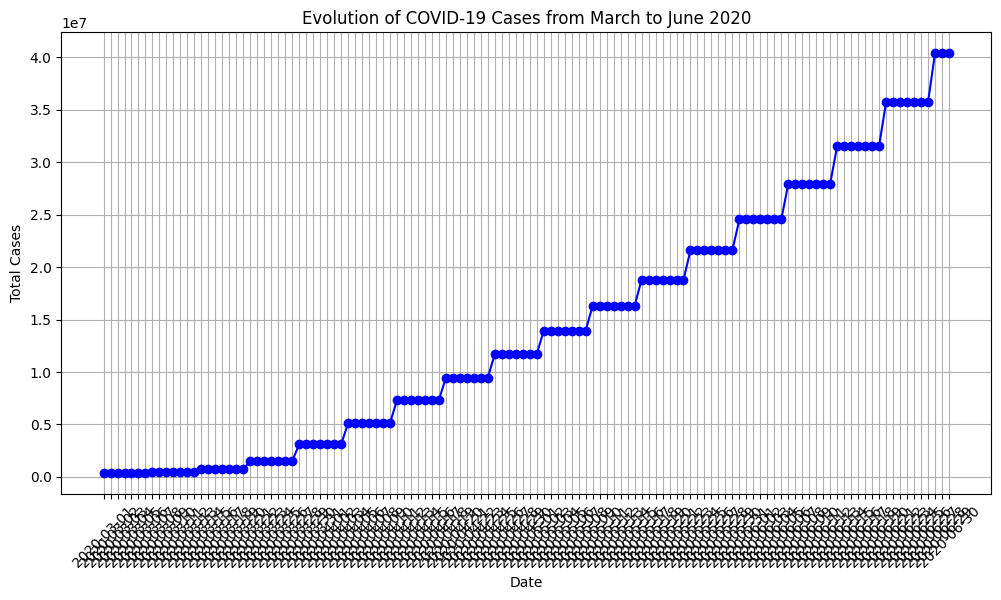

In [21]:
# 세션을 생성
with CodeInterpreterSession() as session:
    # 사용자 입력에 기반해 응답 생성
    response = session.generate_response(
        "Generate a plot of the evolution of COVID-19 cases from March to June 2020, taking data from web."
    )

    # 응답 출력
    print("AI: ", response.content)
    for file in response.files:
        file.show_image()

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000022A9C7B4F10>


INFO: Using a LocalBox which is not fully isolated
      and not scalable across multiple users.
      Make sure to use a CODEBOX_API_KEY in production.
      Set envar SHOW_INFO=False to not see this again.

AI:  The plot of the price of the S&P500 index in the last 5 days has been generated and displayed above.


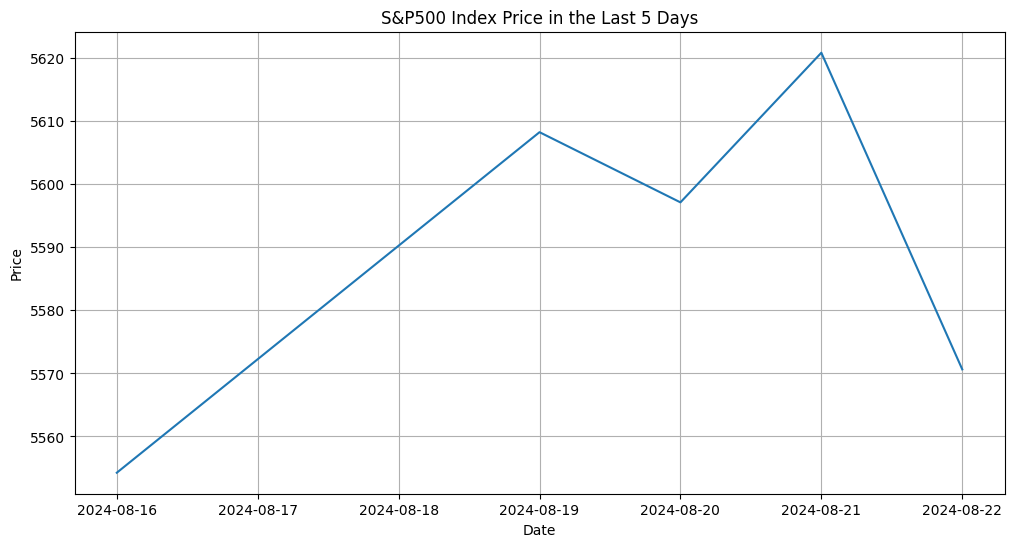

In [23]:
# create a session
with CodeInterpreterSession() as session:
    # 사용자 입력에 기반해 응답 생성
    response = session.generate_response(
        "Generate a plot of the price of S&P500 index in the last 5 days."
    )

    # 응답 출력
    print("AI: ", response.content)
    for file in response.files:
        file.show_image()

다음 주소에서 Titanic dataset을 다운로드하고 압축을 풀어 tested.csv를 준비한 뒤에 이어서 실습합니다.  
https://www.kaggle.com/datasets/brendan45774/test-file

INFO: Using a LocalBox which is not fully isolated
      and not scalable across multiple users.
      Make sure to use a CODEBOX_API_KEY in production.
      Set envar SHOW_INFO=False to not see this again.

AI:  The histogram above shows the distribution of passenger ages in the dataset. It appears that there were more younger passengers compared to older ones.


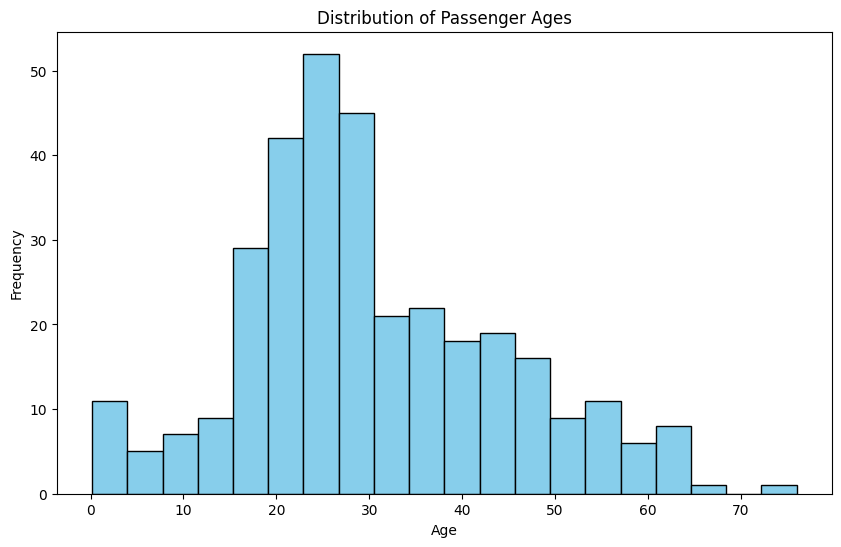

In [27]:
from codeinterpreterapi import CodeInterpreterSession, File


with CodeInterpreterSession() as session:
        # 사용자 요청을 정의
        user_request = "Analyze this dataset and plot something interesting about it."
        files = [
            File.from_path("tested.csv"),
        ]

        # 응답을 생성
        response = session.generate_response(
            user_request, files=files
        )

        # 응답 출력
        print("AI: ", response.content)
        for file in response.files:
            file.show_image()